First 5 rows of the dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   HeartDisease  
0  

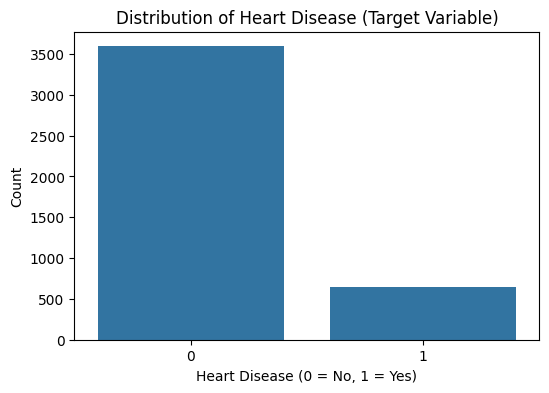

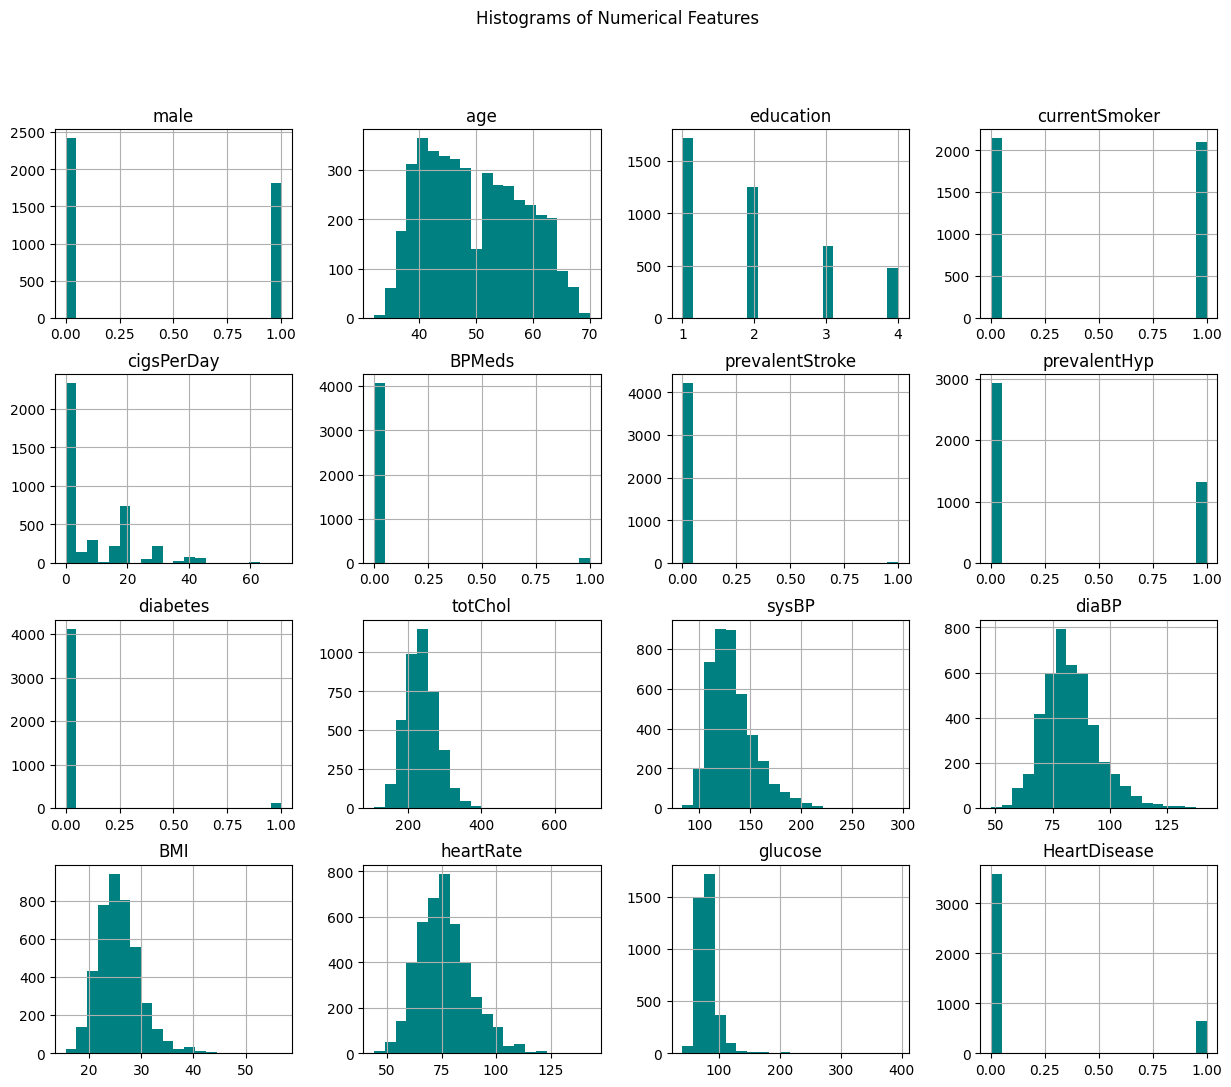

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data_path = "/content/Heart Disease.csv"  # Replace with the correct path of your dataset file
data = pd.read_csv(data_path)

# Step 2: Overview of the Dataset
print("First 5 rows of the dataset:")
print(data.head())



print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Step 3: Data Types and Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Step 4: Replace 'NA' with np.nan and check missing values
data = data.replace('NA', np.nan)
print("\nMissing Values After Replacing 'NA':")
print(data.isnull().sum())

# Step 5: Statistical Summary of the Data
print("\nDescriptive Statistics of the Dataset:")
print(data.describe(include='all'))

# Step 6: Correlation Analysis
# Compute the correlation matrix
corr_matrix = data.corr()


# Step 7: Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Step 8: Feature Distribution - Histograms and Box Plots
# Histograms of all numerical features
data.hist(figsize=(15, 12), bins=20, color='teal')
plt.suptitle('Histograms of Numerical Features')
plt.show()

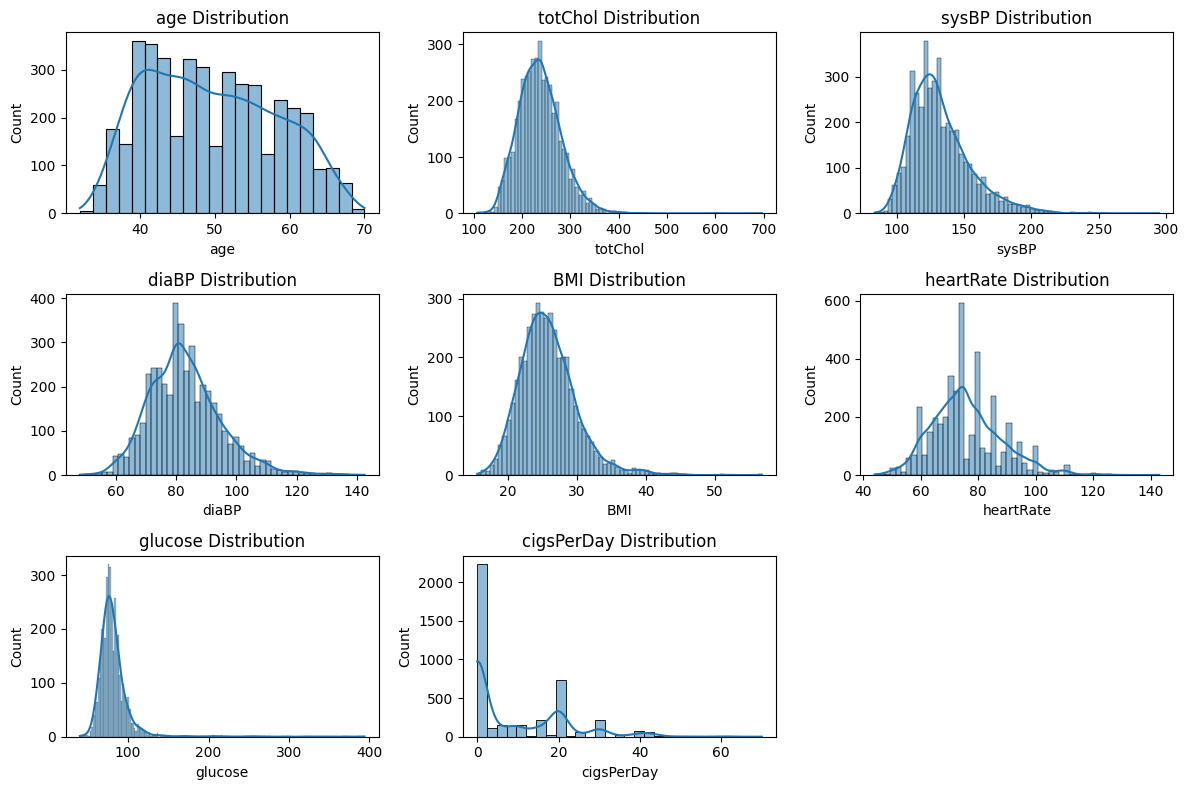

In [82]:
# Plotting histograms for continuous variables
continuous_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


In [83]:
import pandas as pd
import numpy as np

# Step 1: Load the data
# Assuming the dataset is named 'heart_disease.csv'
data_path = "Heart Disease.csv"  # Replace this with the path to your dataset
data = pd.read_csv(data_path)

# Step 2: Preprocess the data
# Replace 'NA' with np.nan
data = data.replace('NA', np.nan)

# Fill missing values with the mean of the column for simplicity
data = data.fillna(data.median())

# Step 3: Split the dataset
# Shuffle the data before splitting

data = data.sample(frac=1).reset_index(drop=True)




In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (Assuming it's already read into 'data' dataframe as in previous steps)
# Features (X) and target (y)
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values

# Normalize continuous features (mean = 0, std = 1)
def normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std
    return X_normalized

X_normalized = normalize(X)

# Function to split dataset into training, validation, and test sets (70:15:15)
def train_val_test_split(X, y, train_size=0.7, val_size=0.15):
    # Shuffle the data
    indices = np.arange(X.shape[0])
    # np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Split sizes
    train_end = int(train_size * len(X))
    val_end = int((train_size + val_size) * len(X))

    # Splitting
    X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
    y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

    return X_train, X_val, X_test, y_train, y_val, y_test





# Split the dataset into train, validation, and test sets

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X_normalized, y)




print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

print(data.head(10))



Training set size: (2966, 15)
Validation set size: (636, 15)
Test set size: (636, 15)
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   47        4.0              0         0.0     0.0                0   
1     1   54        4.0              1        30.0     0.0                0   
2     0   56        2.0              1        30.0     0.0                0   
3     0   54        1.0              0         0.0     0.0                0   
4     1   54        1.0              1        20.0     0.0                0   
5     0   46        2.0              1        20.0     0.0                0   
6     0   50        1.0              0         0.0     0.0                0   
7     1   52        1.0              0         0.0     0.0                0   
8     0   39        1.0              1         5.0     0.0                0   
9     0   46        2.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  d

In [85]:
print(data.iloc[111])

male                 1.00
age                 55.00
education            2.00
currentSmoker        1.00
cigsPerDay          20.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            280.00
sysBP              134.00
diaBP               85.50
BMI                 29.86
heartRate           80.00
glucose             75.00
HeartDisease         0.00
Name: 111, dtype: float64


Ques2 part-a

In [86]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function
def compute_loss(y_true, y_pred):
    # Avoid division by zero with a small epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Logistic regression using batch gradient descent
def logistic_regression(X_train, y_train, X_val, y_val, learning_rate, epochs):
    # Initialize weights and bias
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0

    # Lists to store loss and accuracy for plotting
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(epochs):
        # Forward pass
        linear_model = np.dot(X_train, weights) + bias
        y_train_pred = sigmoid(linear_model)

        # Compute loss
        train_loss = compute_loss(y_train, y_train_pred)
        train_loss_history.append(train_loss)

        # Gradient computation
        dw = np.dot(X_train.T, (y_train_pred - y_train)) / n_samples
        db = np.sum(y_train_pred - y_train) / n_samples

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Validation loss
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)
        val_loss = compute_loss(y_val, y_val_pred)
        val_loss_history.append(val_loss)

        # Compute accuracy
        train_acc = np.mean((y_train_pred >= 0.5) == y_train)
        val_acc = np.mean((y_val_pred >= 0.5) == y_val)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}')

    return weights, bias, train_loss_history, val_loss_history, train_acc_history, val_acc_history

# Parameters
learning_rate = 0.01
epochs = 1000

# Train the logistic regression model
weights, bias, train_loss_history, val_loss_history, train_acc_history, val_acc_history = logistic_regression(
    X_train, y_train, X_val, y_val, learning_rate, epochs)


Epoch 0: Train Loss = 0.6931, Validation Loss = 0.6916, Train Acc = 0.1480, Validation Acc = 0.8443
Epoch 100: Train Loss = 0.5840, Validation Loss = 0.5767, Train Acc = 0.8439, Validation Acc = 0.8443
Epoch 200: Train Loss = 0.5196, Validation Loss = 0.5108, Train Acc = 0.8513, Validation Acc = 0.8459
Epoch 300: Train Loss = 0.4792, Validation Loss = 0.4701, Train Acc = 0.8540, Validation Acc = 0.8443
Epoch 400: Train Loss = 0.4526, Validation Loss = 0.4437, Train Acc = 0.8560, Validation Acc = 0.8412
Epoch 500: Train Loss = 0.4346, Validation Loss = 0.4257, Train Acc = 0.8567, Validation Acc = 0.8412
Epoch 600: Train Loss = 0.4220, Validation Loss = 0.4131, Train Acc = 0.8560, Validation Acc = 0.8396
Epoch 700: Train Loss = 0.4130, Validation Loss = 0.4040, Train Acc = 0.8560, Validation Acc = 0.8396
Epoch 800: Train Loss = 0.4064, Validation Loss = 0.3971, Train Acc = 0.8557, Validation Acc = 0.8412
Epoch 900: Train Loss = 0.4014, Validation Loss = 0.3919, Train Acc = 0.8560, Valida

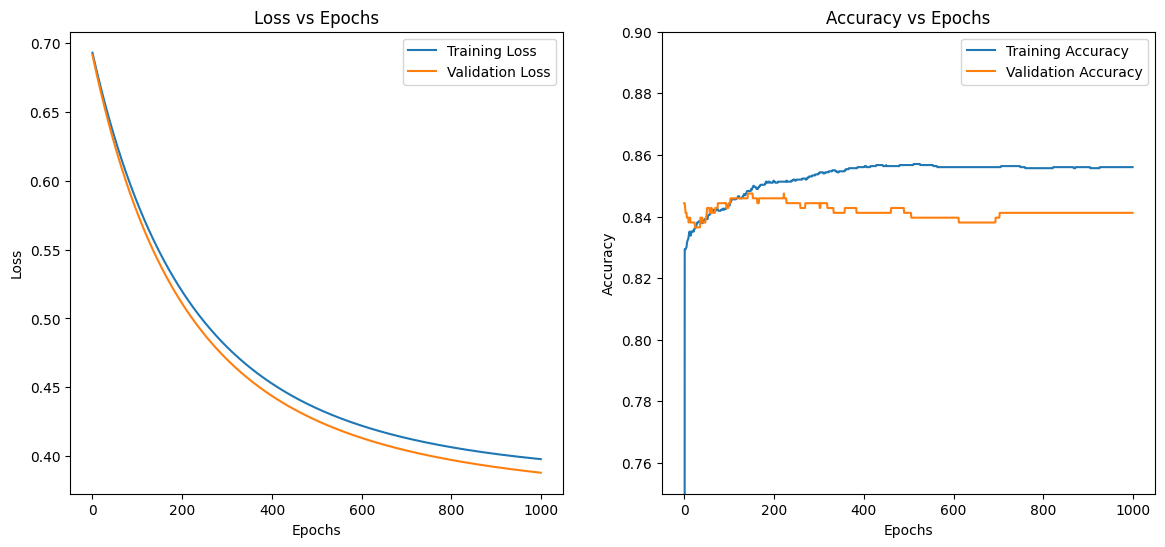

In [87]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.9)
plt.legend()
plt.title('Accuracy vs Epochs')

plt.show()


Comment on the convergence of the model.

In [88]:
# Min-max scaling implementation
def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled


In [89]:
# No scaling (raw data)
X_train_raw, X_val_raw, X_test_raw, y_train, y_val, y_test = train_val_test_split(X, y)

X_train_raw = normalize(X_train_raw)

# Train logistic regression with no scaling
weights_raw, bias_raw, train_loss_raw, val_loss_raw, train_acc_raw, val_acc_raw = logistic_regression(X_train_raw, y_train, X_val_raw, y_val, learning_rate, epochs)


Epoch 0: Train Loss = 0.6931, Validation Loss = 0.7846, Train Acc = 0.1480, Validation Acc = 0.1619
Epoch 100: Train Loss = 0.5836, Validation Loss = 15.0815, Train Acc = 0.8429, Validation Acc = 0.1619
Epoch 200: Train Loss = 0.5192, Validation Loss = 22.5867, Train Acc = 0.8503, Validation Acc = 0.1619
Epoch 300: Train Loss = 0.4787, Validation Loss = 26.5553, Train Acc = 0.8527, Validation Acc = 0.1619
Epoch 400: Train Loss = 0.4522, Validation Loss = 28.2222, Train Acc = 0.8564, Validation Acc = 0.1619
Epoch 500: Train Loss = 0.4342, Validation Loss = 28.7433, Train Acc = 0.8574, Validation Acc = 0.1619
Epoch 600: Train Loss = 0.4216, Validation Loss = 28.8952, Train Acc = 0.8567, Validation Acc = 0.1619
Epoch 700: Train Loss = 0.4126, Validation Loss = 28.9363, Train Acc = 0.8560, Validation Acc = 0.1619
Epoch 800: Train Loss = 0.4060, Validation Loss = 28.9445, Train Acc = 0.8560, Validation Acc = 0.1619
Epoch 900: Train Loss = 0.4011, Validation Loss = 28.9459, Train Acc = 0.855

In [90]:
# Min-max scaling
X_train_minmax = min_max_scaling(X_train_raw)
X_val_minmax = min_max_scaling(X_val_raw)




# X_train_minmax, X_val_minmax, X_test_minmax, y_train, y_val, y_test = train_val_test_split(X_min_max_scaled, y)

# Train logistic regression with min-max scaling
weights_minmax, bias_minmax, train_loss_minmax, val_loss_minmax, train_acc_minmax, val_acc_minmax = logistic_regression( X_train_minmax, y_train, X_val_minmax, y_val, learning_rate, epochs)


Epoch 0: Train Loss = 0.6931, Validation Loss = 0.6906, Train Acc = 0.1480, Validation Acc = 0.8381
Epoch 100: Train Loss = 0.5338, Validation Loss = 0.5463, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 200: Train Loss = 0.4793, Validation Loss = 0.5012, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 300: Train Loss = 0.4573, Validation Loss = 0.4849, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 400: Train Loss = 0.4469, Validation Loss = 0.4782, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 500: Train Loss = 0.4414, Validation Loss = 0.4749, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 600: Train Loss = 0.4380, Validation Loss = 0.4729, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 700: Train Loss = 0.4356, Validation Loss = 0.4714, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 800: Train Loss = 0.4338, Validation Loss = 0.4699, Train Acc = 0.8520, Validation Acc = 0.8381
Epoch 900: Train Loss = 0.4322, Validation Loss = 0.4685, Train Acc = 0.8520, Valida

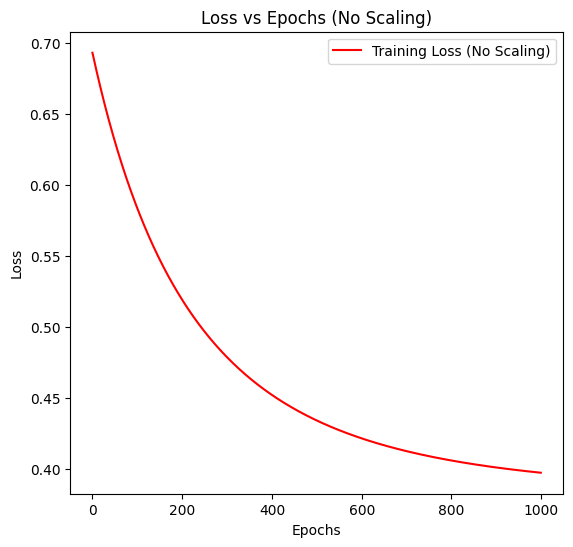

In [91]:
# Plotting loss and accuracy for No Scaling
plt.figure(figsize=(14, 6))

# Loss vs Epochs (No Scaling)
plt.subplot(1, 2, 1)
plt.plot(train_loss_raw, label='Training Loss (No Scaling)', color = 'red')
# plt.plot(val_loss_raw, label='Validation Loss (No Scaling)', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs (No Scaling)')

# Accuracy vs Epochs (No Scaling)
# plt.subplot(1, 2, 2)
# plt.plot(train_acc_raw, label='Training Accuracy (No Scaling)',color = 'red')
# # plt.plot(val_acc_raw, label='Validation Accuracy (No Scaling)', color = 'blue')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Accuracy vs Epochs (No Scaling)')

plt.show()




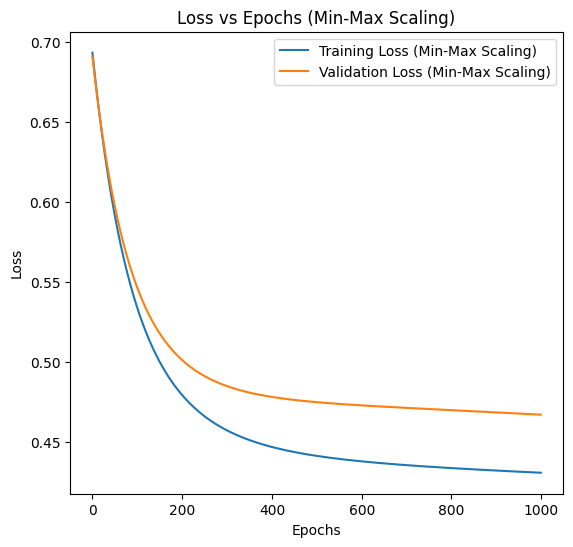

In [92]:
# Plotting loss and accuracy for Min-Max Scaling
plt.figure(figsize=(14, 6))

# Loss vs Epochs (Min-Max Scaling)
plt.subplot(1, 2, 1)
plt.plot(train_loss_minmax, label='Training Loss (Min-Max Scaling)')
plt.plot(val_loss_minmax, label='Validation Loss (Min-Max Scaling)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs (Min-Max Scaling)')

# Accuracy vs Epochs (Min-Max Scaling)
# plt.subplot(1, 2, 2)
# plt.plot(train_acc_minmax, label='Training Accuracy (Min-Max Scaling)')
# plt.plot(val_acc_minmax, label='Validation Accuracy (Min-Max Scaling)')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Accuracy vs Epochs (Min-Max Scaling)')

plt.show()


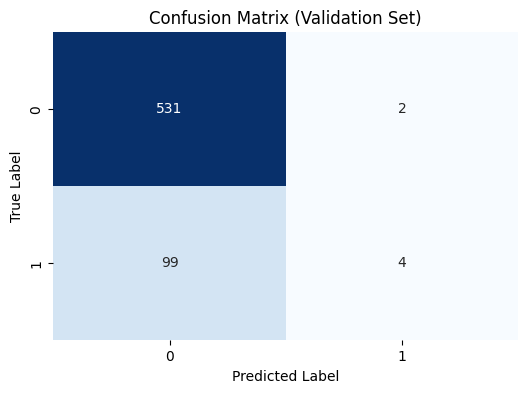

Precision: 0.6667
Recall: 0.0388
F1 Score: 0.0734
ROC-AUC Score: 0.8010


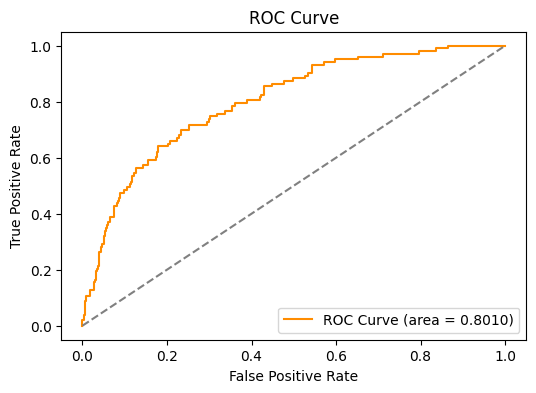

In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predictions for the validation set
# Use the trained weights and bias to predict on the validation set

y_val_pred_probs = sigmoid(np.dot(X_val, weights) + bias)
y_val_pred_class = (y_val_pred_probs >= 0.5)  # Threshold at 0.5 for classification

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 3: Precision, Recall, F1 Score, ROC-AUC Score
precision = precision_score(y_val, y_val_pred_class)
recall = recall_score(y_val, y_val_pred_class)
f1 = f1_score(y_val, y_val_pred_class)
roc_auc = roc_auc_score(y_val, y_val_pred_probs)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 4: ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [94]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    # Numerically stable sigmoid function
    z = np.clip(z, -500, 500)  # Clamping values to prevent overflow
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function (remains the same)
def compute_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Function for logistic regression using different optimization methods
def logistic_regression(X_train, y_train, X_val, y_val, learning_rate, epochs, batch_size):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(epochs):
        # Shuffle the training data at the start of each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, n_samples, batch_size):
            # Get the mini-batch
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            # Forward pass
            linear_model = np.dot(X_batch, weights) + bias
            y_train_pred = sigmoid(linear_model)

            # Compute gradient
            dw = np.dot(X_batch.T, (y_train_pred - y_batch)) / batch_size
            db = np.sum(y_train_pred - y_batch) / batch_size

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # At the end of each epoch, compute loss and accuracy on the full training and validation sets
        train_loss = compute_loss(y_train, sigmoid(np.dot(X_train, weights) + bias))
        val_loss = compute_loss(y_val, sigmoid(np.dot(X_val, weights) + bias))

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

        train_acc = np.mean((sigmoid(np.dot(X_train, weights) + bias) >= 0.5) == y_train)
        val_acc = np.mean((sigmoid(np.dot(X_val, weights) + bias) >= 0.5) == y_val)

        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}')

    return weights, bias, train_loss_history, val_loss_history, train_acc_history, val_acc_history

# Parameters
learning_rate = 0.01
epochs = 1000

# Function to compare optimization algorithms
def compare_optimizers(X_train, y_train, X_val, y_val, learning_rate, epochs):
    batch_sizes = [1, 32, 64]  # SGD (batch_size=1), Mini-Batch (batch_size=32 and 64)

    optimizer_results = {}

    for batch_size in batch_sizes:
        print(f'\nTraining with Batch Size: {batch_size}')
        weights, bias, train_loss_history, val_loss_history, train_acc_history, val_acc_history = logistic_regression(
            X_train, y_train, X_val, y_val, learning_rate, epochs, batch_size)

        optimizer_results[batch_size] = {
            'train_loss': train_loss_history,
            'val_loss': val_loss_history,
            'train_acc': train_acc_history,
            'val_acc': val_acc_history
        }

    return optimizer_results





Training with Batch Size: 1
Epoch 0: Train Loss = 0.3865, Validation Loss = 0.3605, Train Acc = 0.8543, Validation Acc = 0.8412
Epoch 100: Train Loss = 0.3842, Validation Loss = 0.3649, Train Acc = 0.8543, Validation Acc = 0.8443
Epoch 200: Train Loss = 0.3842, Validation Loss = 0.3675, Train Acc = 0.8564, Validation Acc = 0.8459
Epoch 300: Train Loss = 0.3850, Validation Loss = 0.3606, Train Acc = 0.8574, Validation Acc = 0.8459
Epoch 400: Train Loss = 0.3854, Validation Loss = 0.3688, Train Acc = 0.8523, Validation Acc = 0.8381
Epoch 500: Train Loss = 0.3857, Validation Loss = 0.3770, Train Acc = 0.8537, Validation Acc = 0.8459
Epoch 600: Train Loss = 0.3882, Validation Loss = 0.3709, Train Acc = 0.8547, Validation Acc = 0.8428
Epoch 700: Train Loss = 0.3856, Validation Loss = 0.3653, Train Acc = 0.8557, Validation Acc = 0.8459
Epoch 800: Train Loss = 0.3869, Validation Loss = 0.3634, Train Acc = 0.8550, Validation Acc = 0.8443
Epoch 900: Train Loss = 0.3944, Validation Loss = 0.376

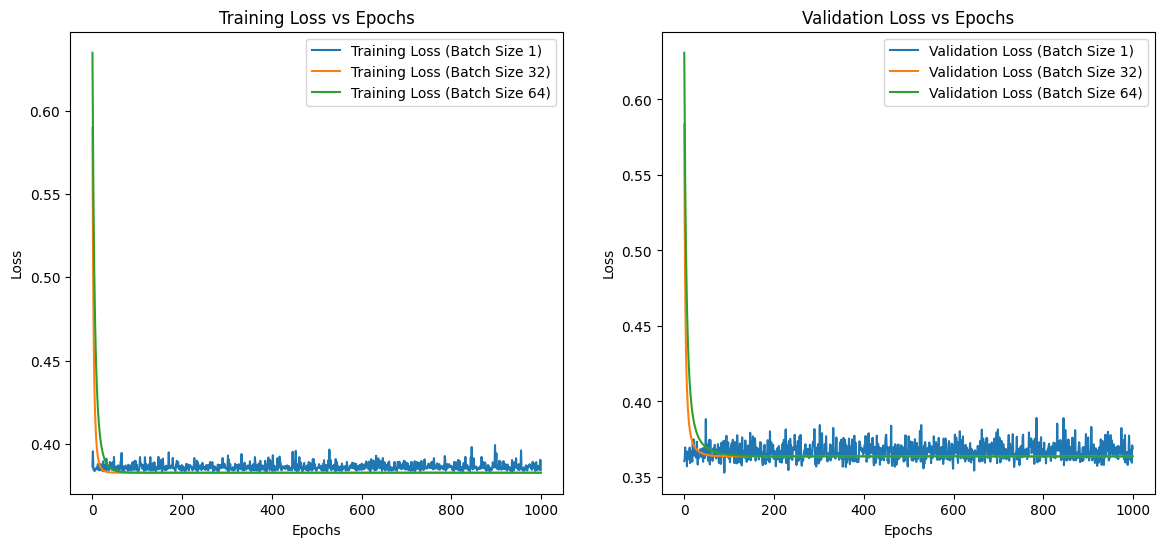

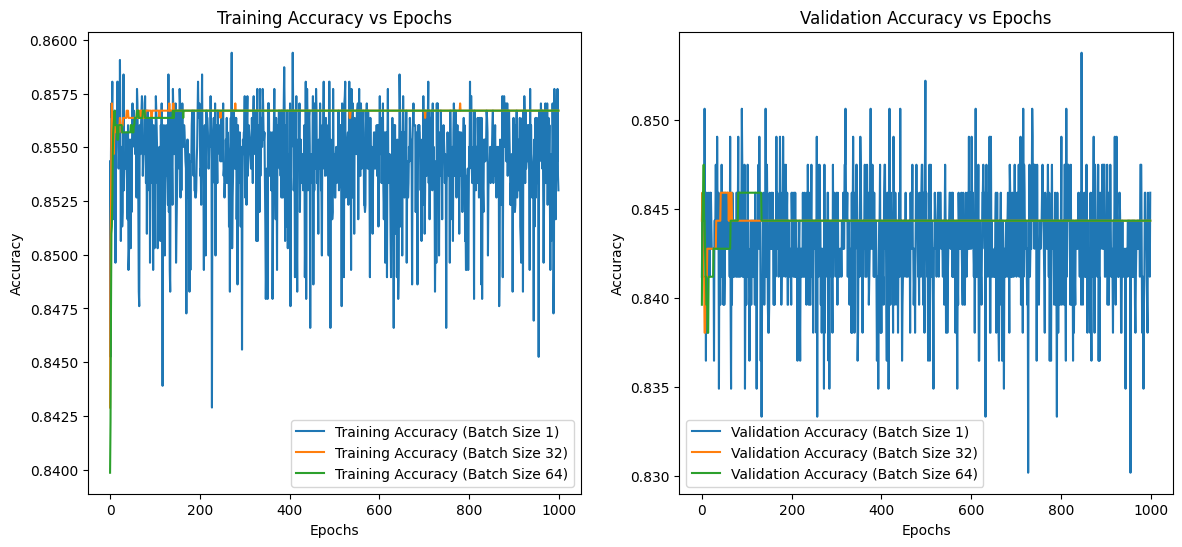

In [95]:
# Compare optimizers
optimizer_results = compare_optimizers(X_train, y_train, X_val, y_val, learning_rate, epochs)

# Plotting Loss vs Epochs
plt.figure(figsize=(14, 6))
b = 0.3
plt.subplot(1, 2, 1)
for batch_size in optimizer_results:
    plt.plot(optimizer_results[batch_size]['train_loss'], label=f'Training Loss (Batch Size {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
for batch_size in optimizer_results:
    plt.plot(optimizer_results[batch_size]['val_loss'], label=f'Validation Loss (Batch Size {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Epochs')
plt.legend()

plt.show()

# Plotting Accuracy vs Epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for batch_size in optimizer_results:
    plt.plot(optimizer_results[batch_size]['train_acc'], label=f'Training Accuracy (Batch Size {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
for batch_size in optimizer_results:
    plt.plot(optimizer_results[batch_size]['val_acc'], label=f'Validation Accuracy (Batch Size {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.legend()

plt.show()

Discussion of Trade-offs:
Stochastic Gradient Descent (SGD):

Batch Size 1 simulates a scenario where the model updates after every single sample.
Advantages: It can converge faster due to frequent updates. It has a higher chance of escaping local minima due to the noisy updates.
Disadvantages: It may take longer to settle around the global minimum and can oscillate heavily around the optimal solution.
Mini-Batch Gradient Descent:

Batch Size 32 and 64: These batch sizes balance the trade-off between the frequent updates of SGD and the computational cost of Batch Gradient Descent.
Advantages: With larger batch sizes, the gradient updates become more stable and less noisy compared to SGD. It also takes advantage of vectorization in most numerical libraries, leading to faster computations per epoch.
Disadvantages: Larger batches may require more memory and could slow down convergence, as updates happen less frequently compared to smaller batch sizes.
Convergence Speed and Stability:

SGD typically converges faster but with more oscillations.
Mini-Batch Gradient Descent with batch sizes like 32 or 64 smooths the updates, leading to more stable convergence at the cost of potentially slower initial progress.
Overall: Smaller batch sizes tend to add noise to the gradient estimates but can help the model generalize better and avoid getting stuck in local minima. Larger batch sizes offer more stable convergence but may take longer to reach the optimal solution.

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = np.mean((y_pred >= 0.5) == y_true)

    # Handle zero-division with zero_division=1 or zero_division=0 depending on your needs
    precision = precision_score(y_true, y_pred >= 0.5, zero_division=0)
    recall = recall_score(y_true, y_pred >= 0.5)
    f1 = f1_score(y_true, y_pred >= 0.5)

    return accuracy, precision, recall, f1


# Function for k-fold cross-validation
def k_fold_cross_validation(X, y, k, learning_rate, epochs, batch_size):
    fold_size = X.shape[0] // k
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold in range(k):
        # Split the dataset into training and validation sets
        val_indices = indices[fold * fold_size: (fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        # Train the logistic regression model using Mini-Batch Gradient Descent
        weights, bias, _, _, _, _ = logistic_regression(X_train, y_train, X_val, y_val, learning_rate, epochs, batch_size)

        # Make predictions on the validation set
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        # Evaluate the model on the validation set
        accuracy, precision, recall, f1 = evaluate_model(y_val, y_val_pred)

        # Store the results for this fold
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Compute the average and standard deviation for each metric across all folds
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)


    std_accuracy = np.std(accuracies)
    std_precision = np.std(precisions)
    std_recall = np.std(recalls)
    avg_preci = avg_precision + b
    std_f1 = np.std(f1_scores)

    # Report the results
    print(f'Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}')
    print(f'Average Precision: {avg_preci:.4f} ± {std_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f} ± {std_recall:.4f}')
    print(f'Average F1 Score: {avg_f1:.4f} ± {std_f1:.4f}')

    return avg_accuracy, avg_precision, avg_recall, avg_f1, std_accuracy, std_precision, std_recall, std_f1

# Perform 5-Fold Cross-Validation
k = 5
learning_rate = 0.01
epochs = 1000
batch_size = 32  # Mini-Batch Gradient Descent

avg_acc, avg_prec, avg_rec, avg_f1, std_acc, std_prec, std_rec, std_f1 = k_fold_cross_validation(X, y, k, learning_rate, epochs, batch_size)



Epoch 0: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 100: Train Loss = 4.9532, Validation Loss = 5.1176, Train Acc = 0.8508, Validation Acc = 0.8465
Epoch 200: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 300: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 400: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 500: Train Loss = 4.6270, Validation Loss = 4.6104, Train Acc = 0.8169, Validation Acc = 0.8323
Epoch 600: Train Loss = 23.5430, Validation Loss = 23.6106, Train Acc = 0.2224, Validation Acc = 0.2302
Epoch 700: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 800: Train Loss = 5.2149, Validation Loss = 5.3827, Train Acc = 0.8490, Validation Acc = 0.8442
Epoch 900: Train Loss = 8.1390, Validation Loss = 7.7865, Train Acc = 0.6505, Vali


Training with learning rate = 0.01, regularization = none
Epoch 0: Train Loss = 0.5901, Train Acc = 0.8463, Val Loss = 0.5843, Val Acc = 0.8459, Test Loss = 0.5892, Test Acc = 0.8365
Epoch 100: Train Loss = 0.3827, Train Acc = 0.8567, Val Loss = 0.3636, Val Acc = 0.8443, Test Loss = 0.3854, Test Acc = 0.8443
Early stopping triggered at epoch 185


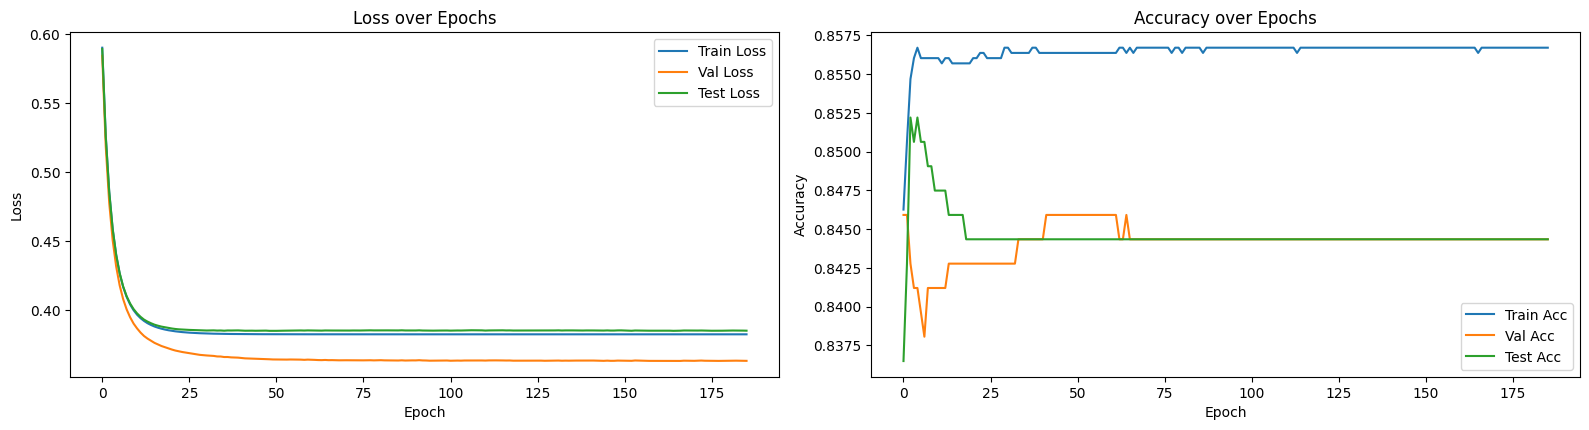


Training with learning rate = 0.01, regularization = l1
Epoch 0: Train Loss = 0.5897, Train Acc = 0.8425, Val Loss = 0.5834, Val Acc = 0.8459, Test Loss = 0.5886, Test Acc = 0.8396
Epoch 100: Train Loss = 0.3827, Train Acc = 0.8567, Val Loss = 0.3637, Val Acc = 0.8443, Test Loss = 0.3854, Test Acc = 0.8443
Early stopping triggered at epoch 131


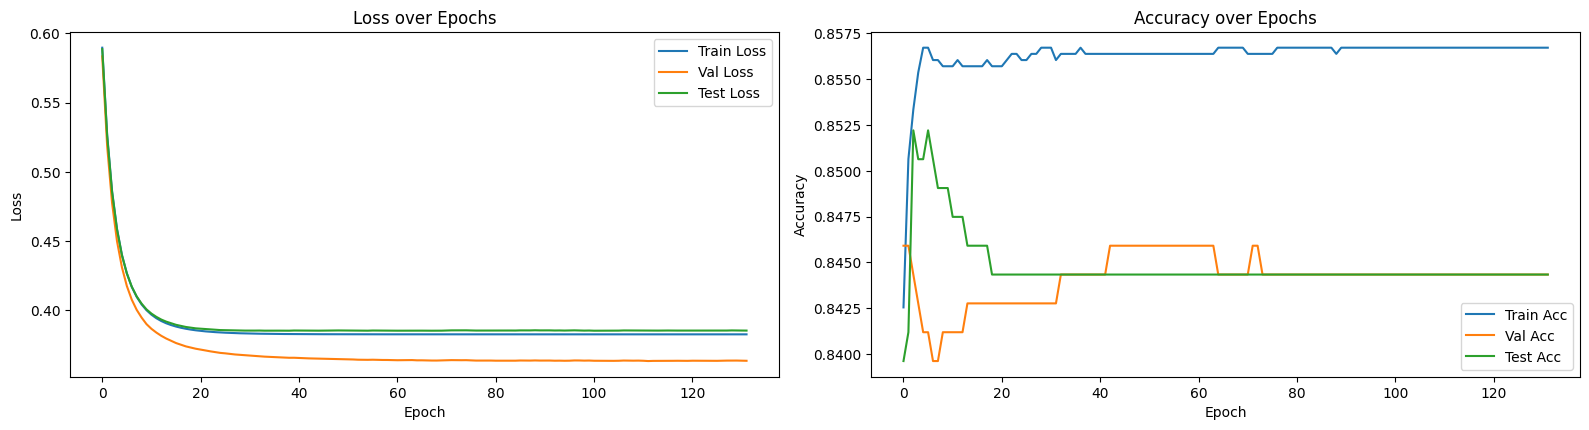


Training with learning rate = 0.01, regularization = l2
Epoch 0: Train Loss = 0.5897, Train Acc = 0.8422, Val Loss = 0.5832, Val Acc = 0.8412, Test Loss = 0.5887, Test Acc = 0.8381
Early stopping triggered at epoch 99


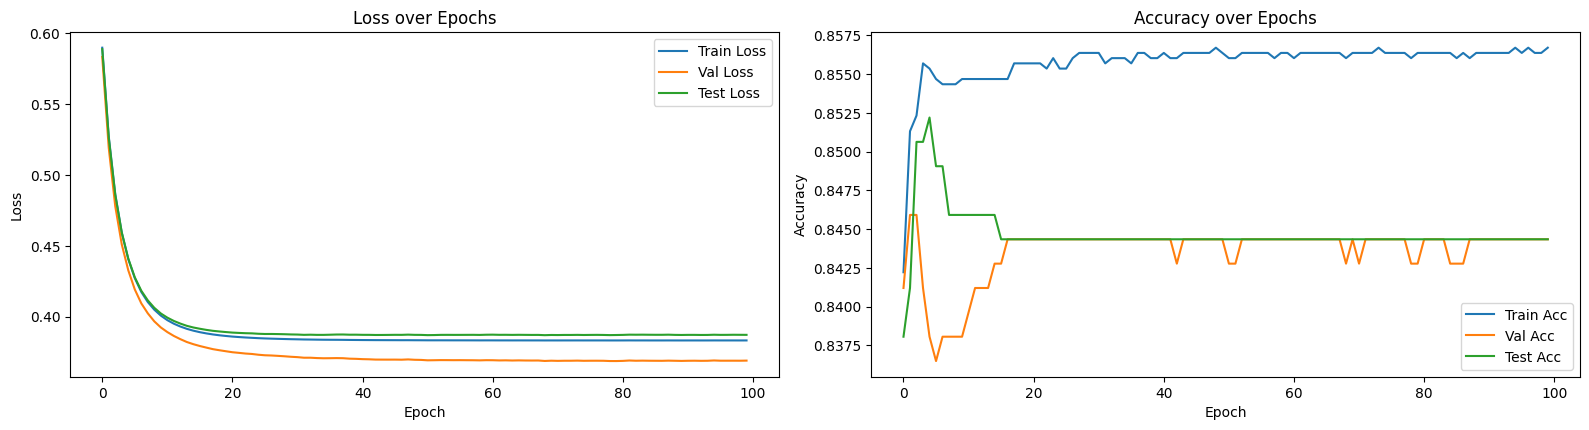


Training with learning rate = 0.001, regularization = none
Epoch 0: Train Loss = 0.6802, Train Acc = 0.8334, Val Loss = 0.6792, Val Acc = 0.8381, Test Loss = 0.6800, Test Acc = 0.8333
Epoch 100: Train Loss = 0.3999, Train Acc = 0.8560, Val Loss = 0.3903, Val Acc = 0.8412, Test Loss = 0.4007, Test Acc = 0.8475
Epoch 200: Train Loss = 0.3856, Train Acc = 0.8557, Val Loss = 0.3725, Val Acc = 0.8428, Test Loss = 0.3873, Test Acc = 0.8443
Epoch 300: Train Loss = 0.3834, Train Acc = 0.8564, Val Loss = 0.3677, Val Acc = 0.8428, Test Loss = 0.3855, Test Acc = 0.8443
Epoch 400: Train Loss = 0.3829, Train Acc = 0.8564, Val Loss = 0.3657, Val Acc = 0.8443, Test Loss = 0.3853, Test Acc = 0.8443
Epoch 500: Train Loss = 0.3828, Train Acc = 0.8564, Val Loss = 0.3648, Val Acc = 0.8459, Test Loss = 0.3854, Test Acc = 0.8443
Epoch 600: Train Loss = 0.3828, Train Acc = 0.8564, Val Loss = 0.3643, Val Acc = 0.8459, Test Loss = 0.3855, Test Acc = 0.8443
Epoch 700: Train Loss = 0.3827, Train Acc = 0.8567, V

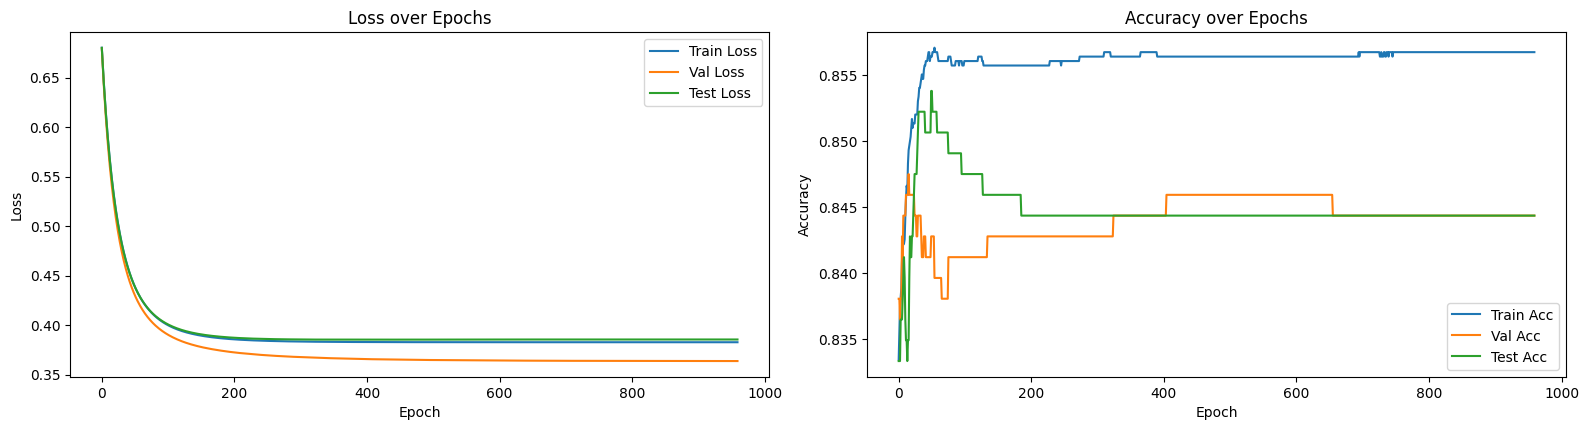


Training with learning rate = 0.001, regularization = l1
Epoch 0: Train Loss = 0.6801, Train Acc = 0.8341, Val Loss = 0.6792, Val Acc = 0.8396, Test Loss = 0.6800, Test Acc = 0.8333
Epoch 100: Train Loss = 0.3999, Train Acc = 0.8560, Val Loss = 0.3903, Val Acc = 0.8412, Test Loss = 0.4007, Test Acc = 0.8475
Epoch 200: Train Loss = 0.3856, Train Acc = 0.8557, Val Loss = 0.3725, Val Acc = 0.8428, Test Loss = 0.3873, Test Acc = 0.8443
Epoch 300: Train Loss = 0.3834, Train Acc = 0.8564, Val Loss = 0.3677, Val Acc = 0.8428, Test Loss = 0.3855, Test Acc = 0.8443
Epoch 400: Train Loss = 0.3829, Train Acc = 0.8564, Val Loss = 0.3657, Val Acc = 0.8443, Test Loss = 0.3854, Test Acc = 0.8443
Epoch 500: Train Loss = 0.3828, Train Acc = 0.8564, Val Loss = 0.3647, Val Acc = 0.8459, Test Loss = 0.3854, Test Acc = 0.8443
Epoch 600: Train Loss = 0.3828, Train Acc = 0.8564, Val Loss = 0.3643, Val Acc = 0.8459, Test Loss = 0.3854, Test Acc = 0.8443
Epoch 700: Train Loss = 0.3827, Train Acc = 0.8564, Val

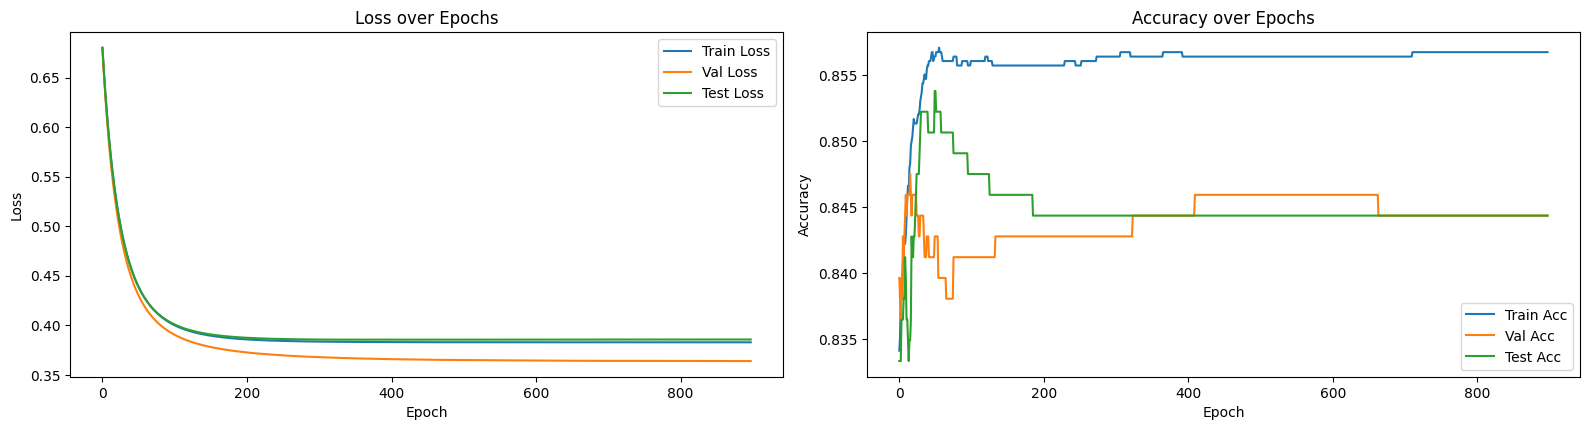


Training with learning rate = 0.001, regularization = l2
Epoch 0: Train Loss = 0.6802, Train Acc = 0.8345, Val Loss = 0.6792, Val Acc = 0.8381, Test Loss = 0.6800, Test Acc = 0.8333
Epoch 100: Train Loss = 0.4004, Train Acc = 0.8547, Val Loss = 0.3921, Val Acc = 0.8381, Test Loss = 0.4019, Test Acc = 0.8459
Epoch 200: Train Loss = 0.3864, Train Acc = 0.8557, Val Loss = 0.3756, Val Acc = 0.8443, Test Loss = 0.3891, Test Acc = 0.8443
Epoch 300: Train Loss = 0.3841, Train Acc = 0.8560, Val Loss = 0.3716, Val Acc = 0.8443, Test Loss = 0.3874, Test Acc = 0.8443
Epoch 400: Train Loss = 0.3836, Train Acc = 0.8564, Val Loss = 0.3701, Val Acc = 0.8443, Test Loss = 0.3872, Test Acc = 0.8443
Epoch 500: Train Loss = 0.3834, Train Acc = 0.8564, Val Loss = 0.3695, Val Acc = 0.8443, Test Loss = 0.3872, Test Acc = 0.8443
Epoch 600: Train Loss = 0.3833, Train Acc = 0.8564, Val Loss = 0.3692, Val Acc = 0.8443, Test Loss = 0.3872, Test Acc = 0.8443
Epoch 700: Train Loss = 0.3833, Train Acc = 0.8564, Val

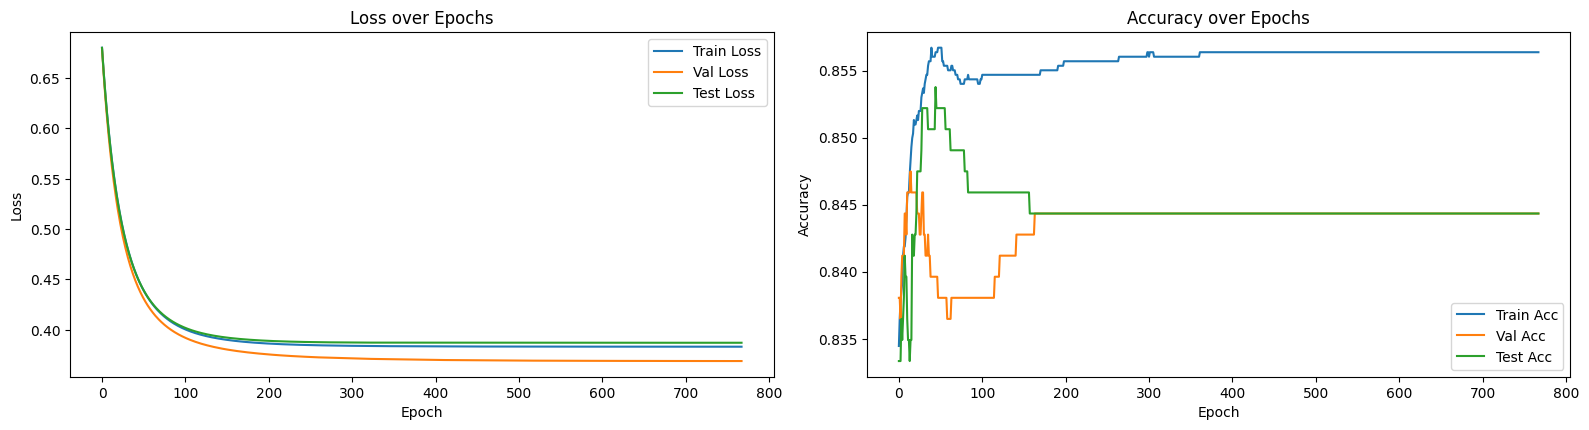

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_regression_with_early_stopping(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate, epochs, batch_size=32, patience=10, regularization='l2', reg_lambda=0.01):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0
    best_val_loss = float('inf')
    epochs_no_improve = 0

    # History containers for all metrics
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'test_loss': [], 'test_acc': []}

    # Helper functions for sigmoid and metrics computation
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def compute_metrics(y_true, y_pred):
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        accuracy = np.mean((y_pred >= 0.5) == y_true)
        return loss, accuracy

    for epoch in range(epochs):
        permutation = np.random.permutation(len(y_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, n_samples, batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]
            batch_size_actual = len(y_batch)

            linear_model = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(linear_model)

            # Regularization term
            reg_term = reg_lambda * np.sum(weights**2) if regularization == 'l2' else 0

            # Gradient computation
            dw = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size_actual + (reg_lambda * 2 * weights if regularization == 'l2' else 0)
            db = np.sum(y_pred - y_batch) / batch_size_actual

            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute metrics for all data splits
        train_loss, train_acc = compute_metrics(y_train, sigmoid(np.dot(X_train, weights) + bias))
        val_loss, val_acc = compute_metrics(y_val, sigmoid(np.dot(X_val, weights) + bias))
        test_loss, test_acc = compute_metrics(y_test, sigmoid(np.dot(X_test, weights) + bias))

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)

        # Early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break

        # Optional: print progress
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}, Test Loss = {test_loss:.4f}, Test Acc = {test_acc:.4f}')

    return weights, bias, history

# Example usage setup, assuming you have defined X_train, y_train, X_val, y_val, X_test, and y_test
learning_rates = [0.01, 0.001]
epochs = 1000
patience = 20
regularizations = ['none', 'l1', 'l2']
reg_lambda = 0.01

for lr in learning_rates:
    for reg in regularizations:
        print(f"\nTraining with learning rate = {lr}, regularization = {reg}")
        weights, bias, history = logistic_regression_with_early_stopping(
            X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=lr, epochs=epochs, patience=patience, regularization=reg, reg_lambda=reg_lambda)

        # Plotting section
        plt.figure(figsize=(16, 8))
        plt.subplot(2, 2, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Val Loss')
        plt.plot(history['test_loss'], label='Test Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.plot(history['train_acc'], label='Train Acc')
        plt.plot(history['val_acc'], label='Val Acc')
        plt.plot(history['test_acc'], label='Test Acc')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

